# Data Science Project: Teaching Assistance Dataset

Name : Atul Mishra

Email: atul.nothing@gmail.com

Project_ID : PRCP-1026-Teaching Assistance

Start Date : 21/08/2024

End Date : 28/08/2024

Batch_ID : PTID-CDS-AUG-24-2023

Dataset_link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1026-TeachingAssistance.zip

Analysis

* Perform a 3D animation graph which help to visualize 3 feature data. (Scatter Plot)

* Perform Expolatie Data Analysis.

* Train and Test with different classification models and get the highest accuracy score in Random Forest Classifier

Domain Analysis

1. Whether of not the Teacher is a native English speaker (binary); 1=English speaker, 2=non-English speaker
2. Course instructor (categorical, 25 categories)
3. Course (categorical, 26 categories)
4. Summer or regular semester (binary) 1=Summer, 2=Regular
5. Class size (numerical)
6. Class attribute (categorical) 1=Low, 2=Medium, 3=High


### Installing Libraries

In [ ]:
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from summarytools import dfSummary

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

### Importing Dataset

In [ ]:
df=pd.read_csv('/content/tae.csv',names=['speaker', 'instructor', 'course', 'semester', 'class_size', 'attribute'])
df.head()

,speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


### Basic Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   speaker     151 non-null    int64
 1   instructor  151 non-null    int64
 2   course      151 non-null    int64
 3   semester    151 non-null    int64
 4   class_size  151 non-null    int64
 5   attribute   151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [ ]:
df.describe()

,speaker,instructor,course,semester,class_size,attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


### EDA

In [ ]:
fig= px.scatter_3d(df,x='course',y='instructor',z='class_size',color='attribute')
fig.show()

In [ ]:
for i in df.columns:
  fig= px.histogram(df,x=i)
  fig.update_layout(bargap=0.1)
  fig.show()


In [ ]:
data= df.copy()

Whether of not the Teacher is a native English speaker (binary); 1=English speaker, 2=non-English speaker

Summer or regular semester (binary) 1=Summer, 2=Regular

Class attribute (categorical) 1=Low, 2=Medium, 3=High

In [ ]:
data['speaker']= data['speaker'].map({1:'English speaker',2:'non-English speaker'})
data['semester']= data['semester'].map({1:'Summer',2:'Regular'})
data['attribute']= data['attribute'].map({1:'Low',2:'Medium',3:'High'})

In [ ]:
data.columns

Index(['speaker', 'instructor', 'course', 'semester', 'class_size',
       'attribute'],
      dtype='object')

In [ ]:
fig= px.histogram(data,y='instructor',x='attribute')
fig.show()

In [ ]:
fig= px.histogram(data,y='class_size',x='attribute')
fig.show()

In [ ]:
fig= px.histogram(data,x='semester',y='instructor')
fig.show()

In [ ]:
fig= px.histogram(data,x='attribute',y='course')
fig.show()

### Data Preprocessing

<Axes: >

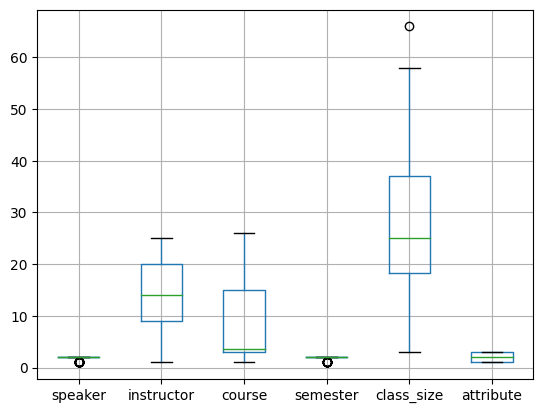

In [ ]:
#outlier detection
df.boxplot()

In [ ]:
df.isnull().sum()

,0
speaker,0
instructor,0
course,0
semester,0
class_size,0
attribute,0


In [ ]:
df.duplicated().sum()

41

In [ ]:
df.drop_duplicates(inplace=True)

### Model Training

In [ ]:
data=df.drop('attribute',axis=1)

In [ ]:
# Scaling :- MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
data= sc.fit_transform(data)


In [ ]:
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4
0,0.0,0.916667,0.08,0.0,0.253968
1,1.0,0.583333,0.08,0.0,0.222222
2,0.0,0.916667,0.08,1.0,0.730159
3,0.0,0.166667,0.04,1.0,0.476190
4,1.0,0.250000,0.40,1.0,0.825397


In [ ]:
x=data
y=df['attribute']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

### Logistic Regression

In [ ]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
print('Confusion_matrix',confusion_matrix(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Test Accuracy_score',accuracy_score(y_test,y_pred))

Confusion_matrix [[4 0 0]
 [1 1 0]
 [2 2 1]]
Classification_report               precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.33      0.50      0.40         2
           3       1.00      0.20      0.33         5

    accuracy                           0.55        11
   macro avg       0.63      0.57      0.49        11
weighted avg       0.72      0.55      0.49        11

Test Accuracy_score 0.5454545454545454


In [ ]:
# training accuracy
y_pred_train = clf.predict(x_train) # Predict labels for training data
print('Train Accuracy',accuracy_score(y_train, y_pred_train)) # Calculate accuracy score with true and predicted labels

Train Accuracy 0.5858585858585859


In [ ]:
#Balancing the data
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x_train,y_train)

### Support Vector classfication

In [ ]:
# Algorithm
model = SVC()

model.fit(x_smote, y_smote)

y_pred_svc = model.predict(x_test)

y_pred_train = model.predict(x_smote) # Predict labels for training data

In [ ]:
# training accuracy
print('Train Accuracy',accuracy_score(y_smote, y_pred_train)) # Calculate accuracy score with true and predicted labels

Train Accuracy 0.5588235294117647


In [ ]:
print('Confusion_matrix',confusion_matrix(y_test,y_pred_svc))
print('Classification_report', classification_report(y_test,y_pred_svc))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_svc))


Confusion_matrix [[4 0 0]
 [1 1 0]
 [2 2 1]]
Classification_report               precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.33      0.50      0.40         2
           3       1.00      0.20      0.33         5

    accuracy                           0.55        11
   macro avg       0.63      0.57      0.49        11
weighted avg       0.72      0.55      0.49        11

Test Accuracy_score 0.5454545454545454


In [ ]:

cross_val = cross_val_score(model,x,y,cv=10,scoring = 'accuracy')
cross_val

array([0.63636364, 0.36363636, 0.54545455, 0.45454545, 0.36363636,
       0.54545455, 0.54545455, 0.27272727, 0.54545455, 0.45454545])

In [ ]:
print('Cross validation score',cross_val.std())

Cross validation score 0.10601730717900544


### Decision Tree Classfication

In [ ]:
#import the algoo
from sklearn.tree import DecisionTreeClassifier

#init
model = DecisionTreeClassifier()

#train
model.fit(x_smote,y_smote)

y_test_pred = model.predict(x_test)

In [ ]:
print('Confusion_matrix',confusion_matrix(y_test,y_test_pred))
print('Classification_report', classification_report(y_test,y_test_pred))
print('Test Accuracy_score',accuracy_score(y_test,y_test_pred))

Confusion_matrix [[3 0 1]
 [0 1 1]
 [1 2 2]]
Classification_report               precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.33      0.50      0.40         2
           3       0.50      0.40      0.44         5

    accuracy                           0.55        11
   macro avg       0.53      0.55      0.53        11
weighted avg       0.56      0.55      0.55        11

Test Accuracy_score 0.5454545454545454


In [ ]:
y_train_pred= model.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred))

Train Accuracy 0.9607843137254902


### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier() # by default it is building 100 estimators

model_rf.fit(x_smote,y_smote)

y_pred_rf = model_rf.predict(x_test)

In [ ]:
#print('Confusion_matrix',confusion_matrix(y_test,y_pred_rf))
print('Classification_report', classification_report(y_test,y_pred_rf))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_rf))

Classification_report               precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.00      0.00      0.00         2
           3       0.67      0.40      0.50         5

    accuracy                           0.55        11
   macro avg       0.41      0.47      0.41        11
weighted avg       0.51      0.55      0.49        11

Test Accuracy_score 0.5454545454545454


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion_matrix', confusion_matrix(y_test, y_pred_rf))

Confusion_matrix [[4 0 0]
 [1 0 1]
 [2 1 2]]


In [ ]:
#traing presdiction
y_train_pred_rf= model_rf.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred_rf))

Train Accuracy 0.9607843137254902


### Hyperparameter Tuning for SVC model

In [ ]:
param_grid = {'C':[50,60,70,80,90,100],
              'gamma':[0.02,0.032,0.001,0.01,0.1,1],
              'random_state':list(range(1,20))}

In [ ]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [50, 60, 70, 80, 90, 100],
                         'gamma': [0.02, 0.032, 0.001, 0.01, 0.1, 1],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
model1 = SVC(C=500,gamma=0.01,random_state=40)
model1.fit(x_smote,y_smote)

SVC(C=500, gamma=0.01, random_state=40)

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
y_train_pred1 = model1.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred1))

Train Accuracy 0.5392156862745098


In [ ]:
print('Testing Accuracy',accuracy_score(y_test,y_pred1))

Testing Accuracy 0.5454545454545454


### Bagging & Boosting

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
base_estimator = SVC()
bagging_model = BaggingClassifier(base_estimator=base_estimator,n_estimators=100,bootstrap= True)
bagging_model.fit(x_smote,y_smote)

BaggingClassifier(base_estimator=SVC(), n_estimators=100)

In [ ]:
predic = bagging_model.predict(x_test)

accuracy_score(y_test,predic)

0.5454545454545454

In [ ]:
# Traing
y_train_pred_bag = bagging_model.predict(x_train)
print('Train Accuracy',accuracy_score(y_train,y_train_pred_bag))

Train Accuracy 0.5656565656565656


In [ ]:
!pip install xgboost

In [ ]:
# Convert y_smote labels to integers
y_smote = y_smote.astype(int)

# Subtract 1 from y_smote to ensure labels start from 0
y_smote = y_smote - 1

xgb = XGBClassifier()
xgb.fit(x_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Convert y_test labels to integers to match y_pred3
y_test = y_test.astype(int) - 1

y_pred3 = xgb.predict(x_test)
print('Testing Accuracy',accuracy_score(y_test,y_pred3))


Testing Accuracy 0.6363636363636364


In [ ]:
# Training Accuracy
y_train_pred3 = xgb.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred3))

Train Accuracy 0.9509803921568627


In [ ]:
report=pd.DataFrame(classification_report(y_test,y_pred3,output_dict=True))
report

,0,1,2,accuracy,macro avg,weighted avg
precision,0.571429,0.5,1.000000,0.636364,0.690476,0.753247
recall,1.000000,0.5,0.400000,0.636364,0.633333,0.636364
f1-score,0.727273,0.5,0.571429,0.636364,0.599567,0.615112
support,4.000000,2.0,5.000000,0.636364,11.000000,11.000000


### Model Comparison Report

This report aimed to develop and evaluate various predictive models for
estimating teacher attibutes using teacher assistance dataset. I explored a variety of classification models, inculding Logistic Regression,SVM,Random FOrest,Decision Tree, Gradient Boosting, XGBoost and HyperParameter Tuning

### Key Performance Matrics
Here are the key performance metrics for the best-performing models on the test

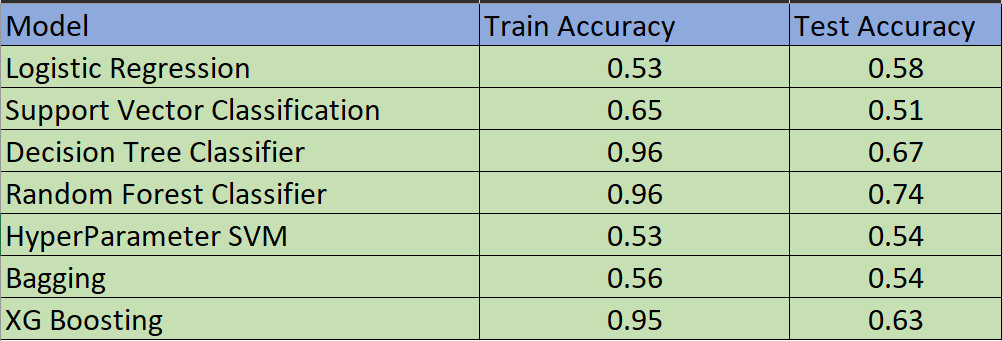